# World Wide Products Inc.
 - EECS 731 Project 6
 - Author: Ashwin Rathore

## Problem Statement
### D(St)reams of Anomalies
 
The real world does not slow down for bad data
1.  Set up a data science project structure in a new git repository in your GitHub account
2.  Download the benchmark data set from
https://www.kaggle.com/boltzmannbrain/nab  or
https://github.com/numenta/NAB/tree/master/data
3.  Load the  one  of the data set into panda data frames
4.  Formulate one or two ideas on how feature engineering would help the data set to establish additional value using exploratory data analysis
5.  Build one or more anomaly detection models to determine the  anomalies  using the other columns as features
6.  Document your process and results
7.  Commit your notebook, source code, visualizations and other supporting files to the git repository in GitHub

## Goal
Our goal is to build one or more anomaly detection models to determine the  anomalies  using the other columns as features.

#### Step 1: Imort data from Demand.csv into pandas dataframe

In [132]:
import pandas as pd
data = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Project 6\EECS-731-Project-6-D(St)reams of Anomalies\data\external\nyc_taxi.csv')

Let's check the top rows of the dataset.

In [133]:
data.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


#### Step 2: Data Analysis and Feature Engineering

Check the number of samples in the dataset

In [134]:
data.shape

(10320, 2)

We have over 10 thousand samples in this dataset. 
Our goal is to build one or more anomaly detection models to determine the  anomalies  using the other columns as features.
Let's split the tiemstamp in 'Date' and 'Time' & look at the dataset.

In [135]:
data[['Date','Time']] = data.timestamp.str.split(expand=True) 
data.head()

,timestamp,value,Date,Time
0,2014-07-01 00:00:00,10844,2014-07-01,00:00:00
1,2014-07-01 00:30:00,8127,2014-07-01,00:30:00
2,2014-07-01 01:00:00,6210,2014-07-01,01:00:00
3,2014-07-01 01:30:00,4656,2014-07-01,01:30:00
4,2014-07-01 02:00:00,3820,2014-07-01,02:00:00


Now we check the missing data in the dataset

In [136]:
data.isnull().sum()

timestamp    0
value        0
Date         0
Time         0
dtype: int64

We don't have any missing values in the dataset.
Let's drop timestamp as we already splitted it and also Time as we are going to do the analysis on the number of taxis hired in a day. We can use the dataframe for other analysis also like number of taxis hired weekly or at a particular time of the day or daytime vs nighttime etc.

In [137]:
data=data.drop(['timestamp','Time'],axis=1)

Let's see what else we can do with the data

In [138]:
data.head()

,value,Date
0,10844,2014-07-01
1,8127,2014-07-01
2,6210,2014-07-01
3,4656,2014-07-01
4,3820,2014-07-01


In [139]:
data.shape

(10320, 2)

Now we are going to take the sum of all the values on a particular day so we can get the total number for that day

In [140]:
data = data.groupby('Date').sum()

Let's look at the data again.

In [141]:
data.head()

,value
Date,
2014-07-01,745967
2014-07-02,733640
2014-07-03,710142
2014-07-04,552565
2014-07-05,555470


Let's see how many records do we have.

In [142]:
data.shape

(215, 1)

Let's plot the data to visualize and see the spikes for anamolies

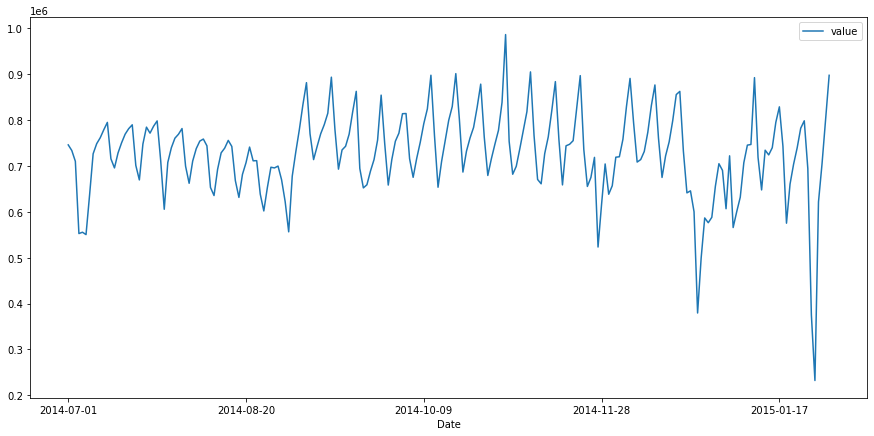

In [143]:
import matplotlib.pyplot as plt
data.plot(figsize=(15,7))

We'll create a model variable and instantiate the IsolationForest class. We are passing the values of four parameters to the Isolation Forest method, listed below.
- Number of estimators: n_estimators is the number of trees that will get built in the forest.
- Max samples: max_samples is the number of samples to be drawn to train each base estimator. 
- Contamination: It refers to the expected proportion of outliers in the data set. 
- Max features: It is the number of features to draw from the total features to train each base estimator or tree.

In [150]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=100, max_samples='auto',contamination=float(0.01),max_features=1.0)
model.fit(data[['value']])

IsolationForest(contamination=0.01)

After the model is defined and fit, let's find the scores and anomaly column. We can find out the values of scores column by calling decision_function() of the trained model and passing the salary as parameter.A negative score value and a -1 for the value of anomaly columns indicate the presence of anomaly. 

In [151]:
data['scores']=model.decision_function(data[['value']])
data['anomaly']=model.predict(data[['value']])
data.head(20)

,value,scores,anomaly
Date,,,
2014-07-01,745967,0.314077,1
2014-07-02,733640,0.310929,1
2014-07-03,710142,0.316767,1
2014-07-04,552565,0.180235,1
2014-07-05,555470,0.186248,1
2014-07-06,550285,0.157474,1
2014-07-07,636570,0.247608,1
2014-07-08,726535,0.306106,1
2014-07-09,748567,0.310333,1


To print the predicted anomalies in the data we need to analyse the data after addition of scores and anomaly column. As you can see above for the predicted anomalies the anomaly column values would be -1 and their scores will be negative.Using this information we can print the predicted anomaly as below.

In [152]:
anomaly=data.loc[data['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

             value    scores  anomaly
Date                                 
2014-11-01  986568 -0.060387       -1
2015-01-26  375311 -0.000498       -1
2015-01-27  232058 -0.108080       -1


## Observation:
- We have detected Anomalies by using IsolationForest model.
- We can detect more anomalies by changing the number of Contamination parameter for the model.